# ARBRES DE CLASSIFICACIÓ
## EXERCICI DE PREDICCIÓ VA O NO A VEURE UN CÓMIC

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("./dat/comics.csv")
df

In [ ]:
df['Nationality'] = df['Nationality'].map({'UK': 0, 'USA': 1, 'N': 2})
df['Go'] = df['Go'].map({'YES': 1, 'NO': 0})

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [ ]:
# Prediccions a partir del model


In [ ]:
# Càlcul de l'exactitud Accuracy
# Podeu veure altres métriques d'avaluació del model a ..
# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn import metrics as m

print("Exactitud:", m.accuracy_score(y, dtree.predict(X)))
print("F1 score:", m.f1_score(y, dtree.predict(X)))



# Bootstrap Aggregation (Random Forests)
# BAGGING O BOSSA DE PROVES

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree


data = datasets.load_wine(as_frame = True)
data


In [ ]:
data.target.value_counts()

In [36]:
# Primera prova, un arbre de decisió normal amb conjunt de entrenament i de test
#
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Arbre de Classificació (entrenament)
#
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

# Evaluació del resultat per grup d'entrenament i pel test
#
y_test_pred = dtree.predict(X_test)

print("Train data accuracy:", m.accuracy_score(y_train, dtree.predict(X_train)))
print("Test data accuracy:", m.accuracy_score(y_test, y_test_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


## ARA entenarem un grup de 12 arbres

In [39]:
# S'agafen les columes de dades i es posen a la X. La columna target és la y
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

# Una bossa de proves de 12 estimadors i per cadascún es recull score

bags = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

bags.fit(X_train, y_train)



BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)

In [40]:
y_test_pred = bags.predict(X_test)
print("Train data accuracy:", m.accuracy_score(y_train,  bags.predict(X_train)))
print("Test data accuracy:", m.accuracy_score(y_test,  y_test_pred))


Train data accuracy: 1.0
Test data accuracy: 0.9555555555555556


In [ ]:
bags.__dict__

## VISUALITZANT DIFERENTS ARBRES

<Figure size 2160x1440 with 0 Axes>

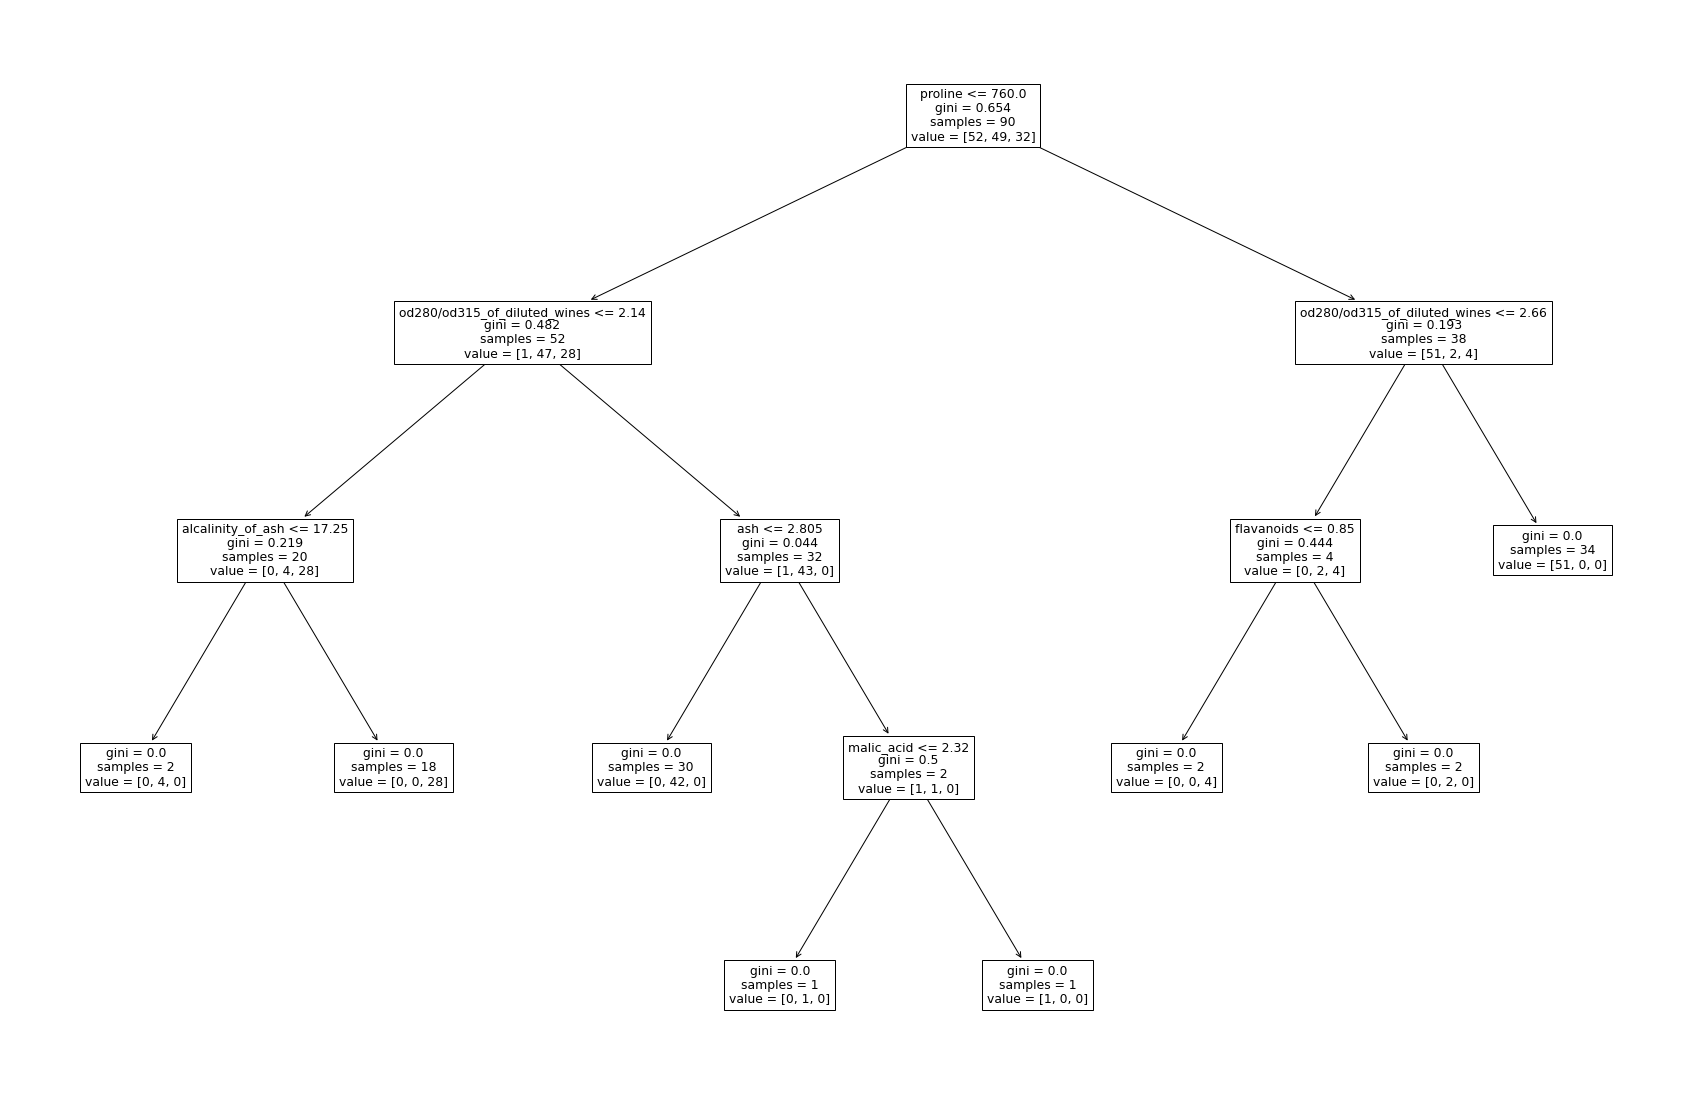

<Figure size 2160x1440 with 0 Axes>

In [42]:
plt.figure(figsize=(30, 20))

#--- Variant el índex dels estimadors podem veure un arbre diferent
plot_tree(bags.estimators_[1], feature_names = X.columns)
plt.figure(figsize=(30, 20))